In [1]:
import pandas as pd 
import numpy as np
import time 
import matplotlib.pyplot as plt
from time import sleep
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

import numpy as np
np.seterr(all="ignore")

from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)


In [2]:
df_accx = pd.read_csv("Downloads/Train_1/Acc_x_train_1.csv", header=None)
df_accy = pd.read_csv("Downloads/Train_1/Acc_y_train_1.csv", header=None)
df_accz = pd.read_csv("Downloads/Train_1/Acc_z_train_1.csv", header=None)
df_gyrx = pd.read_csv("Downloads/Train_1/Gyr_x_train_1.csv", header=None)
df_gyry = pd.read_csv("Downloads/Train_1/Gyr_y_train_1.csv", header=None)
df_gyrz = pd.read_csv("Downloads/Train_1/Gyr_z_train_1.csv", header=None)
labels = pd.read_csv("Downloads/Train_1/labels_train_1.csv", header=None)


In [3]:
df_accx

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-1.077889,-1.489613,-1.438783,-1.457909,-1.330404,-1.071001,-1.506137,-1.439139,-1.466377,-1.402347,...,-1.019677,-0.830715,-0.964348,-1.084696,-1.079483,-1.091208,-1.107158,-1.155510,-1.126861,-1.147167
1,-1.146887,-1.160566,-0.977457,-1.152031,-0.687245,-0.994804,-0.850746,-0.717160,-0.880832,-0.787904,...,-0.939794,-0.681841,-0.672202,-0.806475,-0.852091,-0.756208,-0.291576,-0.888031,-0.839020,-0.808839
2,-0.810237,-0.803906,-0.937367,-0.888830,-0.853493,-0.866375,-1.002508,-0.936785,-0.911975,-0.909091,...,-0.818108,-0.805620,-0.764217,-0.773826,-0.802690,-0.800057,-0.768268,-0.876734,-0.862862,-0.911913
3,-0.946278,-1.021568,-0.935827,-0.886008,-0.869594,-0.796406,-0.803121,-0.829610,-0.901657,-0.922945,...,-0.851171,-0.866475,-0.802323,-0.945886,-0.964929,-0.708072,0.112631,-0.709495,-0.772995,-0.725184
4,-0.706771,-0.779546,-0.476212,-1.128938,-0.949800,-0.929042,-0.820955,-0.839328,-0.895739,-0.896472,...,-0.795637,-1.018215,-0.829386,-0.813845,-0.801443,-0.793584,-0.779280,-0.842876,-0.847628,-0.830808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,0.860861,0.926646,0.975781,1.000463,1.051148,1.099773,1.175936,1.191113,1.205718,1.119732,...,2.284014,2.307471,2.287213,2.286704,2.289199,2.289342,2.188936,2.147420,1.230552,1.223370
5207,0.867162,0.848416,0.827833,1.225863,1.845406,0.813404,1.207018,1.587939,1.426683,1.349285,...,2.523618,2.521772,2.532428,2.526269,2.517060,2.530315,2.525429,2.520982,2.525858,2.530050
5208,2.522300,2.519794,2.535938,2.519522,2.519759,2.509214,2.453885,2.368801,2.295425,2.289396,...,-0.386323,0.382729,0.606361,0.699973,0.862712,1.504549,1.233929,1.075532,0.822507,0.852235
5209,0.982926,1.053619,0.964799,0.930685,1.123505,1.204031,1.053841,0.939975,0.678140,0.989545,...,0.923341,1.355667,1.886200,2.014653,1.942238,1.842240,1.638945,2.089226,2.309646,2.244656


In [4]:
df_accy

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-3.042689,-2.849762,-2.866504,-2.872480,-3.046087,-3.295942,-2.864503,-2.893296,-2.894975,-3.134266,...,-2.704412,-2.635339,-2.640936,-2.724451,-2.703472,-2.688893,-2.698414,-2.699739,-2.695133,-2.704061
1,-2.695182,-2.651077,-2.985256,-3.222526,-3.320487,-2.823430,-2.846682,-2.807795,-2.881476,-2.836180,...,-2.866929,-2.301257,-2.170395,-2.720272,-2.765513,-2.872680,-3.229364,-2.929117,-2.860563,-2.859279
2,-2.834726,-2.863199,-2.790414,-2.808154,-2.794856,-2.861103,-2.807620,-2.783585,-2.812906,-2.812025,...,-2.825314,-2.802556,-2.800139,-2.793177,-2.791322,-2.794531,-2.793143,-2.820481,-2.775676,-2.795703
3,-2.800317,-2.810161,-2.784158,-2.803023,-2.790962,-2.791311,-2.797083,-2.778757,-2.772317,-2.761608,...,-2.800582,-2.768778,-2.783484,-2.741648,-2.713543,-2.758237,-2.897527,-2.868514,-2.848029,-2.860777
4,-2.842639,-2.790093,-3.053917,-2.802748,-2.785534,-2.770120,-2.764651,-2.784589,-2.785037,-2.775467,...,-1.853554,-2.466216,-2.635126,-2.616996,-2.615423,-2.613730,-2.631933,-2.621362,-2.623340,-2.658344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,4.862856,4.833499,4.696054,4.699973,4.773330,4.871981,5.052301,5.097763,4.987653,4.674787,...,5.579494,5.560665,5.584919,5.583107,5.584323,5.584497,5.471871,5.560278,5.248540,5.000719
5207,4.630720,4.541933,4.567318,4.485494,4.316146,4.522055,4.448091,4.353471,4.344239,4.478281,...,5.791800,5.784812,5.804014,5.787878,5.777855,5.793157,5.792883,5.797428,5.779568,5.800372
5208,5.798681,5.794846,5.806818,5.789714,5.786691,5.788064,5.751043,5.748245,5.787670,5.784572,...,7.085399,7.077344,6.440780,6.671841,6.272612,6.007163,5.931284,6.163937,6.469229,6.155357
5209,5.667661,5.600800,6.017774,6.642832,7.030796,6.161934,5.740471,5.891777,6.592513,6.658021,...,6.851487,6.824311,6.354765,5.720958,6.028545,6.837676,6.792713,6.397983,5.309706,5.216553


In [5]:
df_accz

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,9.490958,9.489082,9.491423,9.487663,9.456602,9.411505,9.475417,9.483038,9.474904,9.405075,...,9.599186,9.602288,9.607411,9.580112,9.577246,9.580301,9.577217,9.572769,9.575804,9.573681
1,9.571114,9.572043,9.525989,9.419051,9.433341,9.547120,9.574582,9.579921,9.560588,9.562423,...,9.553980,9.720186,9.728905,9.603864,9.596016,9.564214,9.491248,9.527392,9.558546,9.564704
2,9.572229,9.568761,9.545953,9.555552,9.566551,9.559498,9.552162,9.564638,9.567211,9.571621,...,9.578268,9.578344,9.583025,9.585149,9.583757,9.584450,9.581141,9.574511,9.573921,9.569919
3,9.570084,9.565324,9.563295,9.567150,9.578377,9.585310,9.584341,9.575999,9.578835,9.575119,...,9.574114,9.579842,9.586607,9.590036,9.581470,9.608931,9.580922,9.568507,9.568925,9.568788
4,9.582303,9.571570,9.545086,9.543188,9.571831,9.580899,9.578811,9.577550,9.580148,9.578360,...,9.807005,9.639631,9.626777,9.625316,9.628973,9.632085,9.628795,9.623408,9.619031,9.608914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,-8.282891,-8.396229,-8.389902,-8.387600,-8.348845,-8.214774,-8.307327,-7.994429,-8.185388,-8.392555,...,-7.619747,-7.611326,-7.597790,-7.585320,-7.573957,-7.576759,-7.682734,-7.607888,-8.011768,-8.183101
5207,-8.463002,-8.499518,-8.480191,-8.488051,-8.543510,-8.499769,-8.509555,-8.531914,-8.560138,-8.486094,...,-7.336627,-7.342599,-7.330303,-7.314101,-7.321386,-7.317653,-7.339694,-7.317185,-7.308462,-7.315197
5208,-7.350423,-7.321355,-7.321763,-7.318170,-7.361923,-7.338268,-7.385548,-7.419393,-7.439770,-7.412185,...,-6.887199,-7.078360,-6.880469,-7.118758,-7.405318,-7.421931,-7.640936,-7.394678,-7.160276,-7.491745
5209,-7.901480,-7.932793,-7.578076,-7.004648,-6.543246,-7.326815,-7.732219,-7.524221,-7.246010,-6.912945,...,-6.849268,-6.759649,-6.972498,-7.540784,-7.222463,-6.579629,-6.726451,-6.960347,-7.762013,-7.953816


In [6]:
df_gyrx

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.044689,0.001804,0.005565,-0.003941,-0.043541,0.064023,0.004858,0.005201,-0.003196,-0.041717,...,0.011573,0.000616,0.008934,0.001367,0.004991,0.007416,0.004105,0.006542,0.007273,0.005284
1,0.005139,-0.004273,-0.039340,-0.011162,0.048962,0.020793,0.008060,0.004712,0.006332,0.008611,...,0.004502,0.118724,-0.091203,0.001498,0.010531,-0.037979,0.013496,0.024111,0.008673,0.008108
2,0.006405,0.010463,0.005308,0.006266,0.004361,0.006804,0.008792,0.004064,0.006642,0.007317,...,0.006895,0.007931,0.006392,0.005661,0.006388,0.006541,0.005314,0.005523,0.005919,0.004173
3,0.008588,0.006357,0.005966,0.006403,0.006500,0.006352,0.007036,0.005384,0.007965,0.004927,...,0.009388,0.006430,0.010726,0.008252,0.006655,-0.005366,0.007891,0.003889,-0.001131,0.016977
4,0.006262,-0.006209,0.013502,0.012851,0.009323,0.005414,0.003975,0.009056,0.005005,0.007410,...,-0.038316,-0.026126,0.010279,0.006539,0.006541,0.005743,0.004882,0.007165,0.004564,0.006396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,0.022355,0.019537,0.005410,0.013490,0.013013,0.010854,-0.041205,0.025523,0.015009,0.022133,...,0.008812,0.008957,0.008602,0.008387,0.008289,0.012234,0.020669,0.003951,0.052558,0.049275
5207,0.036337,0.008847,0.007272,0.010888,0.007617,0.009544,0.009872,0.007857,0.009494,-0.001251,...,0.009017,0.008902,0.008474,0.009110,0.008600,0.008544,0.008851,0.009113,0.008318,0.008513
5208,0.008990,0.008754,0.008586,0.008532,0.008769,0.010709,0.012108,0.007472,0.008090,0.008575,...,0.042900,0.037741,-0.011432,0.039146,0.029058,0.033196,-0.011753,-0.008387,-0.009671,0.067382
5209,0.039663,0.031141,-0.046802,-0.086588,0.033047,0.083629,0.022939,-0.044531,0.029352,0.017676,...,0.001145,-0.004002,0.107119,0.024311,-0.099928,0.044294,0.003770,0.111473,0.060230,-0.020810


In [7]:
df_gyrz

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.065891,0.001752,0.002214,0.008423,0.051032,-0.062646,0.000257,0.000201,-0.001175,0.027014,...,0.008101,-0.021275,0.003528,0.006000,0.003261,-0.001911,-0.003524,0.008354,-0.000773,-0.001758
1,0.002253,0.008036,0.057290,-0.008912,-0.048192,-0.038033,0.021406,-0.024272,-0.024175,-0.007555,...,-0.008158,-0.027742,0.015705,-0.004679,0.004252,-0.006638,0.017289,0.004216,0.001229,-0.007947
2,0.001315,-0.002543,-0.001650,-0.003087,-0.009248,0.011387,0.008010,-0.008171,-0.013746,0.005458,...,-0.000102,0.006148,-0.005675,0.001848,0.001094,0.000182,-0.014065,0.018043,0.007523,-0.020283
3,0.013672,0.013287,-0.013796,-0.018822,0.001776,0.001189,-0.002629,0.010648,0.010476,-0.010974,...,-0.009821,-0.007985,0.014600,0.010818,-0.025211,-0.041516,0.019873,0.004239,-0.016336,0.010107
4,-0.001110,-0.007453,0.010066,0.017854,0.002559,-0.004822,-0.014810,0.001499,0.008106,-0.000204,...,-0.010408,0.001223,0.003416,-0.000007,-0.001007,0.003715,-0.005493,0.003147,-0.008621,-0.003543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,0.001933,0.007153,0.002779,-0.002976,0.003578,0.023481,0.021469,0.032933,0.019978,0.000872,...,0.001449,0.001165,0.001226,0.001371,0.001345,0.000857,0.017097,-0.025348,-0.001766,0.001660
5207,-0.002408,0.002520,0.004120,0.007650,0.003421,-0.006914,-0.001677,-0.001791,-0.008862,0.002801,...,0.001494,0.001179,0.001552,0.001185,0.001493,0.001522,0.001290,0.001443,0.001110,0.001402
5208,0.001726,0.001094,0.001068,0.001380,0.001159,0.002748,0.003701,-0.003369,0.001452,0.000204,...,0.019313,0.027336,-0.005125,-0.002831,0.007357,0.010148,-0.025632,-0.019468,-0.003817,-0.031496
5209,-0.045646,-0.018215,-0.005154,0.000623,0.009414,-0.035906,-0.072077,-0.074924,-0.020582,0.011039,...,0.001390,0.001864,0.062114,0.020310,-0.067189,0.023217,0.012615,0.072693,0.071525,0.051334


In [8]:
labels

,0
0,1
1,1
2,1
3,1
4,1
...,...
5206,4
5207,4
5208,4
5209,4


In [9]:
labels.iloc[np.where(labels==4)[0]]

,0
163,4
164,4
165,4
166,4
167,4
...,...
5206,4
5207,4
5208,4
5209,4


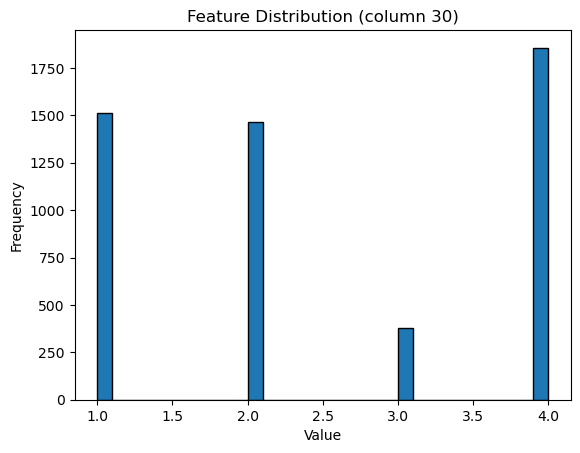

Percent of Data Labeled 1: 0.29034734216081365 
Percent of Data Labeled 2: 0.2807522548455191 
Percent of Data Labeled 3: 0.07253886010362694 
Percent of Data Labeled 4: 0.3563615428900403 
CPU times: total: 938 ms
Wall time: 1.16 s


In [10]:
%%time
ones = labels.iloc[np.where(labels==1)[0]]
twos = labels.iloc[np.where(labels==2)[0]]
threes = labels.iloc[np.where(labels==3)[0]]
fours = labels.iloc[np.where(labels==4)[0]]

plt.hist(labels, bins=30, edgecolor='black')
plt.title('Feature Distribution (column 30)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(f"Percent of Data Labeled 1: {len(ones) / len(labels)} ")
print(f"Percent of Data Labeled 2: {len(twos) / len(labels)} ")
print(f"Percent of Data Labeled 3: {len(threes) / len(labels)} ")
print(f"Percent of Data Labeled 4: {len(fours) / len(labels)} ")


## Data Description

### 6 datasets 
#### - 3 axes of linear acceleration 
#### - 3 axes of rotational acceleration. 

### Human Activity Recognition (HAR)

#### Data is split into 1-minute time windows with no overlap. The i-th row represents the i-th minute time window. Each row has 60 values, corresponding to the sensor axis measurement at each second of the i-th minute. Finally, the label for the i-th time window is stored as the i-th entry of the labels file. 

#### Different row are sorted in increasing time order but they may not be consecutive minute after minute (normally, the next row would be a minute ahead of the previous row but that may not be the case here).

#### We briefly note that the second data columns are a poor choice of features for statistical models. Could use deep-learning to automatically learn the feature representation. 

#### Do not use K-Fold Cross Validation due to the data being time dependent. Can use Holdout cross validation w/o shuffling (hold out the last k% of data or the middle k% of data)

#### We also note that consecutive rows often denote consecutive time windows, meaning that the labels between those consecutive rows should not change too frequently. We could thus consider a smoothing of predictions.

### Accuracy Metric
#### Micro-averaged F1 score: Treats each example equally and favors more frequent classes (activities)

#### Macro-averaged F1 score: treats each class equally. 


### Notes from Hammerla-2016-Deep, convolutional, and recurre.pdf
CNN -> RNN instead of just RNN on sequence of individual samples 
Max-in norm regularization: After each mini-batch the incoming weights of each unit in the network are scaled to have a maximum euclidean length of d_in

Mini-batch with stratification (Can we train w stratification?)

A forward LSTM contextualises the current time-step based on those it has seen previously and is inherently suitable for real-time application where, at inference time, the "future" is not yet known. Bi-directional LSTMs on the other hand use both the future and past context to intepret the input at tiemstep t, which makes then suitable for offline analysis scenarios

For RNN: To prevent a large RNN from memorizing the entire input-output sequence and generalizing poorly, we can introduce "breaks" where the internal states of the RNN are reset to zero: After each mini-batch we decide to retain the internal state of the RNN with a carry-over probabilitty p_carry and reset it to zero otherwise.

After each epoch of training we evaluate the performance of the model on the validation set. Each model is trained for at least 30 epochs and for a maximum of 300 epochs. After 30 epochs, training stops if there is no increase in validation performance for 10 subsequent epochs. We select the epoch that showed the best validation-set performance and apply the corresponding model to the test-set.

fANOVA : Determines the extent to which each hyper-parameter cotributes to a network's performance. It builds a predictive model (random forest) of the model performance as a func- tion of the model’s hyper-parameters.This non-linear model is then decomposed into marginal and joint interaction functions of the hyper-parameters, from which the percentage contribution to overall variability of network performance is obtained.

For CNNs we recommend to start exploring learning-rates, before optimising the architecture of the network, as the learning-parameters had the largest effect on performance in our experiments

However, we found that DNNs are very sensitive to their hyper-parameters and require a significant investment into parameter exploration.


### Two Approaches: 
#### 1) Feature Engineering + Classifier 
#### 2) Neural Networks (DNNs, CNNs, RNNs)

In [11]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks, periodogram
import pywt
from statsmodels.tsa.ar_model import AutoReg


In [43]:
def extract_time_features(x):
    x = np.asarray(x).astype(float).ravel()
    features = {}
    
    # Basic stats
    features['mean'] = x.mean()
    features['std'] = x.std()
    features['var'] = x.var()
    features['median'] = np.median(x)
    features['min'] = x.min()
    features['max'] = x.max()
    features['range'] = x.max() - x.min()
    features['p10'] = np.percentile(x, 10)
    features['p25'] = np.percentile(x, 25)
    features['p75'] = np.percentile(x, 75)
    features['p90'] = np.percentile(x, 90)
    features['iqr'] = features['p75'] - features['p25']
    features['rms'] = np.sqrt(np.mean(x**2))

    # extra time features
    features['mad'] = np.mean(np.abs(x - features['mean']))
    features['sma'] = np.sum(np.abs(x)) / len(x)

    # Hjorth parameters — FIXED for scalar comparisons
    dx = np.diff(x)
    var_dx = dx.var() if dx.size > 0 else 0
    ddx = np.diff(dx)
    var_ddx = ddx.var() if ddx.size > 0 else 0

    features['hjorth_mobility'] = np.sqrt(var_dx / (features['var'] + 1e-12))
    features['hjorth_complexity'] = np.sqrt(var_ddx / (var_dx + 1e-12))

    ## Jerk    
    features['velocity_mean'] = dx.mean()
    features['velocity_std']  = dx.std()
    
    features['accel_mean'] = ddx.mean()
    features['accel_std']  = ddx.std()

    # linear slope
    time = np.arange(len(x))
    quad = np.polyfit(time, x, 2)
    features['slope']      = quad[1]
    features['curvature']  = quad[0]

    # zero crossings
    features['zero_crossings'] = np.sum(np.diff(np.sign(x)) != 0)

    # peaks
    peaks, _ = find_peaks(x)
    features['num_peaks'] = len(peaks)
    features['peak_to_peak'] = np.ptp(x)

    # shape statistics
    features['skewness'] = skew(x)
    features['kurtosis'] = kurtosis(x)

    return features


In [44]:
def extract_freq_features(x, fs=1.0):
    x = np.asarray(x).astype(float).ravel()
    freqs, mag = periodogram(x, fs=fs)
    mag = mag + 1e-12

    features = {}
    features['spec_energy'] = np.sum(mag**2)
    features['dom_freq'] = freqs[np.argmax(mag)]
    features['dom_freq_amp'] = np.max(mag)
    features['mean_freq'] = np.sum(freqs * mag) / np.sum(mag)

    p = mag / np.sum(mag)
    features['spec_entropy'] = -np.sum(p * np.log2(p))

    features['spec_centroid'] = features['mean_freq']

    cumulative = np.cumsum(mag)
    rolloff_idx = np.where(cumulative >= 0.85 * cumulative[-1])[0][0]
    features['spec_rolloff'] = freqs[rolloff_idx]

    features['spec_spread'] = np.sqrt(
        np.sum(((freqs - features['spec_centroid'])**2) * mag) / np.sum(mag)
    )

    features['spec_flatness'] = np.exp(np.mean(np.log(mag))) / np.mean(mag)
    features['spec_flux'] = np.sum(np.diff(mag)**2)

    return features


In [45]:
def extract_autocorr_features(x):
    x = np.asarray(x).astype(float).ravel()
    corr = np.correlate(x - x.mean(), x - x.mean(), mode='full')
    corr = corr[len(corr)//2:]

    features = {}
    features['autocorr_lag1'] = corr[1] / corr[0]
    features['autocorr_lag2'] = corr[2] / corr[0]
    features['autocorr_max'] = np.max(corr[1:]) / corr[0]

    zero_cross = np.where(np.diff(np.sign(corr)))[0]
    features['acf_first_zero_cross'] = zero_cross[0] if len(zero_cross) else -1
    features['acf_integral'] = np.sum(corr)

    for lag in range(1, 11):
        features[f'autocorr_lag{lag}'] = corr[lag] / corr[0]

    return features


In [46]:
def extract_physics_features(ax, ay, az, gx, gy, gz):
    features = {}

    # --- Magnitudes ---
    acc_mag = np.sqrt(ax**2 + ay**2 + az**2)
    gyr_mag = np.sqrt(gx**2 + gy**2 + gz**2)
    
    features['acc_mag_mean'] = acc_mag.mean()
    features['acc_mag_std'] = acc_mag.std()
    features['gyr_mag_mean'] = gyr_mag.mean()
    features['gyr_mag_std'] = gyr_mag.std()

    # --- Jerk ---
    jerk_x = np.diff(ax)
    jerk_y = np.diff(ay)
    jerk_z = np.diff(az)
    jerk_mag = np.sqrt(jerk_x**2 + jerk_y**2 + jerk_z**2)

    features['jerk_mag_mean'] = jerk_mag.mean()
    features['jerk_mag_std'] = jerk_mag.std()

    # --- Angles ---
    pitch = np.arctan2(ax, np.sqrt(ay**2 + az**2))
    roll  = np.arctan2(ay, az + 1e-9)

    features['pitch_mean'] = pitch.mean()
    features['roll_mean'] = roll.mean()
    features['pitch_std'] = pitch.std()
    features['roll_std'] = roll.std()

    # --- SMA ---
    features['sma'] = np.mean(np.abs(ax) + np.abs(ay) + np.abs(az))

    # --- Rotation energy ---
    features['rot_energy'] = np.sum(gx**2 + gy**2 + gz**2)

    # --- Axis correlations ---
    features['corr_ax_ay'] = np.corrcoef(ax, ay)[0,1]
    features['corr_ax_az'] = np.corrcoef(ax, az)[0,1]
    features['corr_ay_az'] = np.corrcoef(ay, az)[0,1]

    features['corr_gx_gy'] = np.corrcoef(gx, gy)[0,1]
    features['corr_gx_gz'] = np.corrcoef(gx, gz)[0,1]
    features['corr_gy_gz'] = np.corrcoef(gy, gz)[0,1]

    return features


In [47]:
def extract_wavelet_features(x):
    x = np.asarray(x).astype(float).ravel()
    coeffs = pywt.wavedec(x, 'db4', level=3)

    features = {}
    for i, c in enumerate(coeffs):
        features[f'wavelet_energy_L{i}'] = np.sum(c**2)
        p = np.abs(c) / (np.sum(np.abs(c)) + 1e-12)
        features[f'wavelet_entropy_L{i}'] = -np.sum(p * np.log2(p + 1e-12))

    return features


In [48]:
def extract_ar_features(x, order=4):
    x = np.asarray(x).astype(float).ravel()
    try:
        model = AutoReg(x, lags=order).fit()
        coeffs = model.params[1:]
    except:
        coeffs = np.zeros(order)
    return {f'ar_coeff_{i}': coeffs[i] for i in range(order)}


In [49]:
def extract_features_from_axis(x):
    f = {}
    f.update(extract_time_features(x))
    f.update(extract_freq_features(x))
    f.update(extract_autocorr_features(x))
    f.update(extract_wavelet_features(x))
    f.update(extract_ar_features(x))
    return f


In [50]:
def extract_features_from_dataset(data):
    rows = []
    for i in range(data.shape[0]):
        rows.append(extract_features_from_axis(data.iloc[i]))
    return pd.DataFrame(rows)


In [51]:
%%time
all_axes = [df_accx, df_accy, df_accz, df_gyrx, df_gyry, df_gyrz]

feature_dfs = []
for axis_data in tqdm(all_axes):
    feature_dfs.append(extract_features_from_dataset(axis_data))

final_features = pd.concat(feature_dfs, axis=1)
print(final_features.shape)


C:\Users\ekkoi\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ekkoi\anaconda3\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\ekkoi\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ekkoi\anaconda3\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\ekkoi\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ekkoi\anaconda3\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\U

(5211, 438)
CPU times: total: 7min 47s
Wall time: 8min 27s


In [52]:
np.mean([1,2,3]).item()

2.0

In [53]:
%%time
def extract_physics_features_row(i):
    ax = df_accx.iloc[i].to_numpy()
    ay = df_accy.iloc[i].to_numpy()
    az = df_accz.iloc[i].to_numpy()
    gx = df_gyrx.iloc[i].to_numpy()
    gy = df_gyry.iloc[i].to_numpy()
    gz = df_gyrz.iloc[i].to_numpy()
    return extract_physics_features(ax, ay, az, gx, gy, gz)

physics_rows = [extract_physics_features_row(i) for i in range(len(df_accx))]
physics_df = pd.DataFrame(physics_rows)

final_features = pd.concat([final_features, physics_df], axis=1)
print(final_features.shape)


(5211, 462)
CPU times: total: 9.52 s
Wall time: 10.2 s


In [54]:
final_features

,mean,std,var,median,min,max,range,p10,p25,p75,...,sma,rot_energy,corr_ax_ay,corr_ax_az,corr_ay_az,corr_gx_gy,corr_gx_gz,corr_gy_gz,cross_corr_xy_max,cross_corr_xy_lag
0,-1.190703,0.347513,0.120765,-1.137014,-1.883107,0.073880,1.956987,-1.518844,-1.456492,-0.996147,...,13.555169,0.180651,0.031065,0.428897,0.889925,0.646754,-0.238135,0.306915,203.234499,0
1,-0.802572,0.166017,0.027562,-0.821124,-1.160566,-0.291576,0.868990,-0.941571,-0.896220,-0.755923,...,13.206888,0.108055,-0.324834,-0.124629,0.956261,0.200292,-0.411187,-0.078221,135.955235,0
2,-0.782922,0.151545,0.022966,-0.803298,-1.002508,-0.089104,0.913404,-0.927304,-0.867109,-0.741392,...,13.178702,0.037735,-0.789096,-0.298133,0.767739,0.576119,0.327614,0.005638,132.039526,0
3,-0.844172,0.191887,0.036821,-0.875538,-1.061969,0.112631,1.174600,-0.989800,-0.949065,-0.796573,...,13.196115,0.075069,-0.141877,0.153594,0.930708,-0.163035,-0.329317,0.247705,139.883692,0
4,-0.748877,0.238754,0.057004,-0.808516,-1.128938,0.088193,1.217131,-0.954825,-0.895922,-0.703322,...,13.022357,0.099841,0.462553,0.568155,0.984428,-0.227829,-0.210979,-0.003012,121.743272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,1.664175,0.742419,0.551187,2.168178,-0.017777,2.514385,2.532162,0.667173,1.051990,2.333478,...,14.926760,0.228530,-0.222820,0.070628,0.947923,-0.819275,0.463584,-0.314337,556.282161,0
5207,1.929627,0.822055,0.675774,2.521377,-0.493841,2.649703,3.143544,0.846358,1.277756,2.534336,...,15.097356,0.152633,0.191455,0.459456,0.956360,-0.894790,0.547537,-0.510392,641.801110,0
5208,1.410571,0.658274,0.433325,1.282742,-0.386323,2.535938,2.922261,0.735760,0.881660,2.015422,...,14.583008,0.534603,-0.160351,-0.067952,0.976096,-0.395766,0.003033,-0.811414,454.300968,0
5209,1.320829,0.481604,0.231942,1.419496,0.100870,2.403774,2.302904,0.772698,0.987890,1.461541,...,14.832605,0.255149,-0.569358,-0.334646,0.960520,-0.682855,0.544564,-0.873683,505.848582,0


In [55]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neural_network import MLPClassifier
import joblib
import warnings

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

warnings.filterwarnings("ignore")

In [57]:
num_classes = (max(labels.values)[0]-1).item()
catboost_params = {
    "depth": 3,
    "learning_rate": 0.19953396878302337,
    "l2_leaf_reg": 0.4229785883655507,
    "border_count": 248,
    "random_strength": 18.8527681039314,
    "verbose": False,
    "loss_function": "MultiClass",
    "eval_metric": "TotalF1",
    "iterations": 800,
    "random_seed": 42,
    "boosting_type": "Plain",
}
lightgbm_params = {
    "learning_rate": 0.08188659667536162,
    "num_leaves": 58,
    "max_depth": 2,
    "min_child_samples": 93,
    "subsample": 0.912313471255047,
    "colsample_bytree": 0.7895528729672887,
    "lambda_l1": 0.3922161378571668,
    "lambda_l2": 0.004750865006676804,
    "n_estimators": 300,
    "random_state": 42,
    "verbose": -1,
    "objective": "multiclass",
    "num_class": num_classes,
    "metric": "multi_logloss",
}
xgboost_params = {
    "booster": "gbtree",
    "eta": 0.09392682152623191,
    "gamma": 1.1637352247633131e-07,
    "max_depth":3,
    "min_child_weight": 3,
    "subsample": 0.8778567636533121,
    "colsample_bytree": 0.7722770656067183,
    "lambda": 0.010030075975424579,
    "alpha": 0.009636313771322243,
    "n_estimators": 1000,
    "random_state": 42,
    "objective": "multi:softmax",  
    "num_class": num_classes,
    "eval_metric": "merror",      
    "tree_method": "gpu_hist",
}

ridge_params = {
    'tol': np.float64(4.291934260128778e-05).item(),
    'fit_intercept': False,
    'alpha': np.float64(0.286606761694825).item(),
}


In [58]:
ridge_params

{'tol': 4.291934260128778e-05,
 'fit_intercept': False,
 'alpha': 0.286606761694825}

In [66]:
RANDOM_STATE = 42
VAL_FRAC = 0.20   # fraction of the data to hold out as validation (time-based, last VAL_FRAC)


# ====== Helper: time-aware train/val split ======
def time_holdout_split(X, y, val_frac=VAL_FRAC):
    """
    Hold out the last val_frac fraction of the samples as validation (no shuffling).
    Inputs:
      X: numpy array or DataFrame, shape (n_samples, n_features)
      y: array-like shape (n_samples,)
    Returns:
      X_train, X_val, y_train, y_val  (as np.arrays)
    """
    n = len(X)
    split = int(np.floor((1.0 - val_frac) * n))
    if isinstance(X, pd.DataFrame):
        X_train = X.iloc[:split].values
        X_val = X.iloc[split:].values
    else:
        X_train = X[:split]
        X_val = X[split:]
    y_train = np.asarray(y[:split])
    y_val = np.asarray(y[split:])
    return X_train, X_val, y_train, y_val

def scale_data(X_train, X_val):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    return X_train_scaled, X_val_scaled, scaler


def evaluate_model(clf, X_val, y_val, model_name):
    y_pred = clf.predict(X_val)
    micro = f1_score(y_val, y_pred, average="micro")
    macro = f1_score(y_val, y_pred, average="macro")
    print(f"=== {model_name} ===")
    print(f"Micro F1: {micro:.4f} | Macro F1: {macro:.4f}")
    print(classification_report(y_val, y_pred, zero_division=0))
    return {"model": model_name, "micro_f1": micro, "macro_f1": macro}

class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dims=[256, 128], n_classes=10, dropout=0.3):
        super().__init__()
        layers = []
        prev = input_dim
        for h in hidden_dims:
            layers.append(nn.Linear(prev, h))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            prev = h
        layers.append(nn.Linear(prev, n_classes))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        return self.net(x)

def train_torch_mlp(X_train, y_train, X_val, y_val, n_classes, device='cpu',
                    hidden_dims=[256,128], lr=1e-3, batch_size=64, epochs=40):
    X_train_t = torch.tensor(X_train, dtype=torch.float32)
    y_train_t = torch.tensor(y_train, dtype=torch.long)
    X_val_t = torch.tensor(X_val, dtype=torch.float32)
    y_val_t = torch.tensor(y_val, dtype=torch.long)

    train_ds = TensorDataset(X_train_t, y_train_t)
    val_ds = TensorDataset(X_val_t, y_val_t)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

    model = SimpleMLP(input_dim=X_train.shape[1], hidden_dims=hidden_dims, n_classes=n_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_macro = -np.inf
    best_state = None
    for epoch in range(1, epochs+1):
        model.train()
        running_loss = 0.0
        for xb, yb in train_loader:
            xb = xb.to(device); yb = yb.to(device)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * xb.size(0)
        avg_train_loss = running_loss / len(train_loader.dataset)

        model.eval()
        all_preds = []
        all_targets = []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(device)
                out = model(xb)
                preds = out.argmax(dim=1).cpu().numpy()
                all_preds.append(preds)
                all_targets.append(yb.numpy())
        all_preds = np.concatenate(all_preds)
        all_targets = np.concatenate(all_targets)
        micro = f1_score(all_targets, all_preds, average='micro')
        macro = f1_score(all_targets, all_preds, average='macro')
        if macro > best_macro:
            best_macro = macro
            best_state = model.state_dict()
        if epoch % 10 == 0 or epoch == 1:
            print(f"[Epoch {epoch}/{epochs}] loss={avg_train_loss:.4f} microF1={micro:.4f} macroF1={macro:.4f}")

    if best_state is not None:
        model.load_state_dict(best_state)
    return model, {"micro_f1": micro, "macro_f1": macro}

def run_all_models(X, y, val_frac=VAL_FRAC, random_state=RANDOM_STATE):
    X_train, X_val, y_train, y_val = time_holdout_split(X, y, val_frac=val_frac)
    print(f"Train samples: {len(X_train)} | Val samples: {len(X_val)}")

    X_train_s, X_val_s, scaler = scale_data(X_train, X_val)

    results = []

    lr = LogisticRegression(max_iter=2000, random_state=random_state, n_jobs=-1, penalty='elasticnet', solver="saga", l1_ratio=.5) #penalty='elasticnet'
    lr.fit(X_train_s, y_train)
    results.append(evaluate_model(lr, X_val_s, y_val, "LogisticRegression"))

    ridge = RidgeClassifier(**ridge_params)
    ridge.fit(X_train_s, y_train)
    results.append(evaluate_model(ridge, X_val_s, y_val, "RidgeClassifier"))

    rf = RandomForestClassifier(n_estimators=200, random_state=random_state, n_jobs=-1)
    rf.fit(X_train_s, y_train)
    results.append(evaluate_model(rf, X_val_s, y_val, "RandomForest"))

    mlp = MLPClassifier(hidden_layer_sizes=(256,128), max_iter=500, early_stopping=True, random_state=random_state)
    mlp.fit(X_train_s, y_train)
    results.append(evaluate_model(mlp, X_val_s, y_val, "Sklearn-MLP"))

    xgb_clf = xgb.XGBClassifier(**xgboost_params)
    xgb_clf.fit(X_train_s, y_train)
    results.append(evaluate_model(xgb_clf, X_val_s, y_val, "XGBoost"))


    lgb_clf = lgb.LGBMClassifier(**lightgbm_params)
    lgb_clf.fit(X_train_s, y_train)
    results.append(evaluate_model(lgb_clf, X_val_s, y_val, "LightGBM"))


    cat_clf = CatBoostClassifier(**catboost_params)
    cat_clf.fit(X_train_s, y_train)
    results.append(evaluate_model(cat_clf, X_val_s, y_val, "CatBoost"))


    n_classes = int(np.max(y) + 1)
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print("Training PyTorch MLP on device:", device)
    pt_model, pt_scores = train_torch_mlp(X_train_s, y_train, X_val_s, y_val, n_classes=n_classes, device=device,
                                          hidden_dims=[256,128], lr=1e-3, batch_size=64, epochs=30) 
    results.append({"model":"PyTorch-MLP", **pt_scores})

    results_df = pd.DataFrame(results).sort_values(by="macro_f1", ascending=False).reset_index(drop=True)
    return results_df



In [67]:
labels.shape

(5211, 1)

In [68]:
X = final_features
y = np.array(labels-1).reshape(-1)# [0,1,2,3] instead of [1,2,3,4]

In [69]:
X.shape,y.shape

((5211, 462), (5211,))

In [72]:
X.fillna(0)

,mean,std,var,median,min,max,range,p10,p25,p75,...,sma,rot_energy,corr_ax_ay,corr_ax_az,corr_ay_az,corr_gx_gy,corr_gx_gz,corr_gy_gz,cross_corr_xy_max,cross_corr_xy_lag
0,-1.190703,0.347513,0.120765,-1.137014,-1.883107,0.073880,1.956987,-1.518844,-1.456492,-0.996147,...,13.555169,0.180651,0.031065,0.428897,0.889925,0.646754,-0.238135,0.306915,203.234499,0
1,-0.802572,0.166017,0.027562,-0.821124,-1.160566,-0.291576,0.868990,-0.941571,-0.896220,-0.755923,...,13.206888,0.108055,-0.324834,-0.124629,0.956261,0.200292,-0.411187,-0.078221,135.955235,0
2,-0.782922,0.151545,0.022966,-0.803298,-1.002508,-0.089104,0.913404,-0.927304,-0.867109,-0.741392,...,13.178702,0.037735,-0.789096,-0.298133,0.767739,0.576119,0.327614,0.005638,132.039526,0
3,-0.844172,0.191887,0.036821,-0.875538,-1.061969,0.112631,1.174600,-0.989800,-0.949065,-0.796573,...,13.196115,0.075069,-0.141877,0.153594,0.930708,-0.163035,-0.329317,0.247705,139.883692,0
4,-0.748877,0.238754,0.057004,-0.808516,-1.128938,0.088193,1.217131,-0.954825,-0.895922,-0.703322,...,13.022357,0.099841,0.462553,0.568155,0.984428,-0.227829,-0.210979,-0.003012,121.743272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,1.664175,0.742419,0.551187,2.168178,-0.017777,2.514385,2.532162,0.667173,1.051990,2.333478,...,14.926760,0.228530,-0.222820,0.070628,0.947923,-0.819275,0.463584,-0.314337,556.282161,0
5207,1.929627,0.822055,0.675774,2.521377,-0.493841,2.649703,3.143544,0.846358,1.277756,2.534336,...,15.097356,0.152633,0.191455,0.459456,0.956360,-0.894790,0.547537,-0.510392,641.801110,0
5208,1.410571,0.658274,0.433325,1.282742,-0.386323,2.535938,2.922261,0.735760,0.881660,2.015422,...,14.583008,0.534603,-0.160351,-0.067952,0.976096,-0.395766,0.003033,-0.811414,454.300968,0
5209,1.320829,0.481604,0.231942,1.419496,0.100870,2.403774,2.302904,0.772698,0.987890,1.461541,...,14.832605,0.255149,-0.569358,-0.334646,0.960520,-0.682855,0.544564,-0.873683,505.848582,0


In [73]:
%%time
# ====== Example usage ======
# Expected: X: (n_samples, n_features), y: (n_samples,)

results = run_all_models(X, y, val_frac=0.20)
print("\nSummary (sorted by macro F1):")
print(results)

Train samples: 4168 | Val samples: 1043
=== RidgeClassifier ===
Micro F1: 0.9003 | Macro F1: 0.8772
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       322
           1       0.96      0.95      0.96       113
           2       0.85      0.71      0.77        31
           3       0.96      0.88      0.92       577

    accuracy                           0.90      1043
   macro avg       0.89      0.87      0.88      1043
weighted avg       0.91      0.90      0.90      1043

=== RandomForest ===
Micro F1: 0.8063 | Macro F1: 0.8764
              precision    recall  f1-score   support

           0       0.63      0.92      0.75       322
           1       0.95      0.99      0.97       113
           2       0.97      1.00      0.98        31
           3       0.94      0.70      0.80       577

    accuracy                           0.81      1043
   macro avg       0.87      0.90      0.88      1043
weighted avg       0.85     

  File "C:\Users\ekkoi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ekkoi\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ekkoi\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ekkoi\anaconda3\Lib\subprocess.

=== LightGBM ===
Micro F1: 0.9329 | Macro F1: 0.9457
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       322
           1       0.96      0.98      0.97       113
           2       0.94      1.00      0.97        31
           3       0.98      0.91      0.94       577

    accuracy                           0.93      1043
   macro avg       0.93      0.96      0.95      1043
weighted avg       0.94      0.93      0.93      1043

=== CatBoost ===
Micro F1: 0.9175 | Macro F1: 0.9317
              precision    recall  f1-score   support

           0       0.82      0.96      0.89       322
           1       0.95      0.97      0.96       113
           2       0.91      1.00      0.95        31
           3       0.98      0.88      0.93       577

    accuracy                           0.92      1043
   macro avg       0.92      0.95      0.93      1043
weighted avg       0.93      0.92      0.92      1043

Training PyTorch MLP on 

In [74]:
results

,model,micro_f1,macro_f1
0,LightGBM,0.932886,0.945726
1,XGBoost,0.922339,0.938762
2,CatBoost,0.917546,0.931701
3,Sklearn-MLP,0.891659,0.913427
4,PyTorch-MLP,0.893576,0.882453
5,RidgeClassifier,0.900288,0.877238
6,RandomForest,0.806328,0.876434


In [ ]:
X

## Feature Selection & Model Tuning

In [ ]:
import optuna
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
import numpy as np


In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
%%time
def CatBoostObjective_TimeSeries(trial):

    param = {
        "loss_function": "MultiClass",
        "eval_metric": "TotalF1",
        "iterations": 800,
        "depth": trial.suggest_int("depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.2, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 50.0, log=True),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_strength": trial.suggest_float("random_strength", 1e-4, 20.0, log=True),
        "task_type": "GPU",
        "boosting_type": "Plain",   # REQUIRED on GPU
        "verbose": False,
        "random_seed": 42
    }

    model = CatBoostClassifier(**param)
    scaler = StandardScaler()
    tscv = TimeSeriesSplit(n_splits=5)
    f1_scores = []

    for train_idx, val_idx in tscv.split(X):
        X_tr = X.iloc[train_idx]
        X_val = X.iloc[val_idx]
        y_tr = y[train_idx]
        y_val = y[val_idx]
        
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)
        model.fit(
            X_tr, y_tr,
            eval_set=(X_val, y_val),
            early_stopping_rounds=50,
            verbose=False
        )

        preds = model.predict(X_val)
        f1_scores.append(f1_score(y_val, preds, average="macro"))

    return np.mean(f1_scores)

"""
# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(CatBoostObjective_TimeSeries, n_trials=100)

print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")
"""

"""
Best trial:
  Value: 0.9655694094591201
  Params: 
    depth: 3
    learning_rate: 0.19953396878302337
    l2_leaf_reg: 0.4229785883655507
    border_count: 248
    random_strength: 18.8527681039314
CPU times: total: 47min 57s
Wall time: 26min 31s
"""


In [ ]:
%%time
# ------------------------------------
# Pre-scale once (massive speedup)
# ------------------------------------

num_classes = len(np.unique(y))

def LightGBMObjective_TimeSeries(trial):

    param = {
        "objective": "multiclass",
        "num_class": num_classes,
        "metric": "multi_logloss",

        # GPU enabled (falls back to CPU automatically)
        "device": "gpu",

        # MAKES IT FAST
        "n_estimators": 300,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 16, 512, log=True),
        "max_depth": trial.suggest_int("max_depth", -1, 12),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "subsample": trial.suggest_float("subsample", 0.7, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),

        "lambda_l1": trial.suggest_float("lambda_l1", 1e-6, 1.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-6, 1.0, log=True),

        "random_state": 42,
        "verbose": -1,
    }

    model = lgb.LGBMClassifier(**param)
    scaler = StandardScaler()
    tscv = TimeSeriesSplit(n_splits=5)
    f1_scores = []

    for train_idx, val_idx in tscv.split(X):

        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]
        
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        model.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            callbacks=[lgb.early_stopping(50)],  # << HUGE speedup
        )

        preds = model.predict(X_val)
        f1 = f1_score(y_val, preds, average="macro")
        f1_scores.append(f1)

    return np.mean(f1_scores)

"""
# Optuna study FAST
study = optuna.create_study(direction='maximize')
study.optimize(LightGBMObjective_TimeSeries, n_trials=20)  # 20 trials = 5–10 min with GPU

print("Best trial:")
trial = study.best_trial
print(f"Value: {trial.value}")
for key, value in trial.params.items():
    print(f"{key}: {value}")

"""

"""
Best trial:
Value: 0.966983960562047
learning_rate: 0.08188659667536162
num_leaves: 58
max_depth: 2
min_child_samples: 93
subsample: 0.912313471255047
colsample_bytree: 0.7895528729672887
lambda_l1: 0.3922161378571668
lambda_l2: 0.004750865006676804
CPU times: total: 1h 38min 30s
Wall time: 17min 20s
"""

In [ ]:
%%time
# Convert once (fast)
X_np = X.to_numpy()
y_np = np.ravel(y)

def XGBoostObjective_TimeSeries(trial):

    num_classes = len(np.unique(y_np))
    
    param = {
        "objective": "multi:softmax",      # or "multi:softprob" for probabilities
        "num_class": num_classes,
        "eval_metric": "merror",           # for multi-class
        "tree_method": "gpu_hist",
        "booster": trial.suggest_categorical("booster", ["gbtree", "dart"]),
        "eta": trial.suggest_float("eta", 0.01, 0.3, log=True),
        "gamma": trial.suggest_float("gamma", 1e-8, 5.0, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 12),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "lambda": trial.suggest_float("lambda", 1e-6, 5.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-6, 5.0, log=True),
        "n_estimators": 1000,
        "random_state": 42,
        "early_stopping_rounds": 50,
    }


    if param["booster"] == "dart":
        param["rate_drop"] = trial.suggest_float("rate_drop", 0.0, 0.3)
        param["skip_drop"] = trial.suggest_float("skip_drop", 0.0, 0.3)


    model = xgb.XGBClassifier(**param)

    tscv = TimeSeriesSplit(n_splits=3)  # 5→3 folds = ~40% faster
    f1_scores = []

    for train_idx, val_idx in tscv.split(X_np):
        X_tr_raw, X_val_raw = X_np[train_idx], X_np[val_idx]
        y_tr, y_val = y_np[train_idx], y_np[val_idx]

        # Scale
        scaler = StandardScaler().fit(X_tr_raw)
        X_tr = scaler.transform(X_tr_raw)
        X_val = scaler.transform(X_val_raw)

        model.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            verbose=False
        )

        preds = model.predict(X_val)
        f1_scores.append(f1_score(y_val, preds, average="macro"))

    return np.mean(f1_scores)


# Faster Optuna run (20–50 trials instead of 100)
"""
study = optuna.create_study(direction='maximize')
study.optimize(XGBoostObjective_TimeSeries, n_trials=30)

print("\nBest trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

"""
    
"""
Best trial:
  Value: 0.9606315024068
  Params:
    booster: gbtree
    eta: 0.09392682152623191
    gamma: 1.1637352247633131e-07
    max_depth: 3
    min_child_weight: 3
    subsample: 0.8778567636533121
    colsample_bytree: 0.7722770656067183
    lambda: 0.010030075975424579
    alpha: 0.009636313771322243
CPU times: total: 17min 29s
Wall time: 16min 11s
"""

In [ ]:
from sklearn.metrics import make_scorer, f1_score

# Correct scorer for multi-class
scorer = make_scorer(f1_score, average="macro")

ridge_params_search = {
    "alpha": np.logspace(-4, 4, 200),
    "fit_intercept": [True, False],
    "tol": np.logspace(-6, -1, 50)
}

ridge_model = RidgeClassifier()

ridge_rand = RandomizedSearchCV(
    estimator=ridge_model,
    param_distributions=ridge_params_search,
    n_iter=50,
    cv=tscv,              # your TimeSeriesSplit
    scoring=scorer,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

#ridge_rand.fit(X, y)
"""
print("Best params:", ridge_rand.best_params_)
print("Best f1:", ridge_rand.best_score_)
"""
"""
Best params: {'tol': np.float64(4.291934260128778e-05), 'fit_intercept': False, 'alpha': np.float64(0.286606761694825)}
Best f1: 0.9315265818384691
"""

In [ ]:
STOP

### Deep Learning

In [ ]:
%%time
y_labels = y_val
ones = y_labels[np.where(y_labels==0)[0]]
twos = y_labels[np.where(y_labels==1)[0]]
threes = y_labels[np.where(y_labels==2)[0]]
fours = y_labels[np.where(y_labels==3)[0]]

plt.hist(labels, bins=30, edgecolor='black')
plt.title('Feature Distribution (column 30)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(f"Percent of Data Labeled 0: {len(ones) / len(y_labels)} ")
print(f"Percent of Data Labeled 1: {len(twos) / len(y_labels)} ")
print(f"Percent of Data Labeled 2: {len(threes) / len(y_labels)} ")
print(f"Percent of Data Labeled 3: {len(fours) / len(y_labels)} ")


In [75]:
BASE_PATH = "Downloads/Train_1/"

Micro-averaged F1 score: 0.7939964685108888
Macro-averaged F1 score: 0.7709647119816684


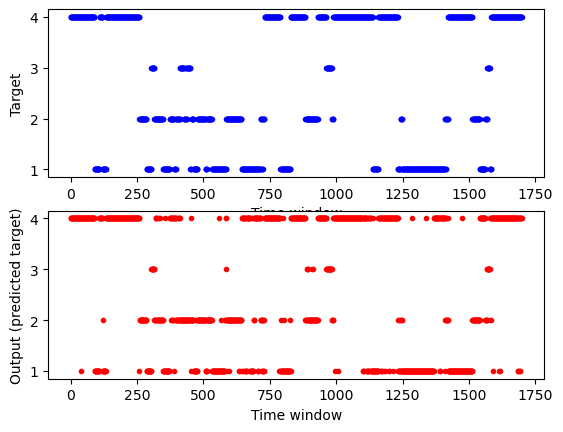

In [76]:
# -*- coding: utf-8 -*-
"""
Demo of logistic regression on mean and standard deviation of each sensor
for activity recognition data
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
sensor_names = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyr_x', 'Gyr_y', 'Gyr_z']
# Last row of training data for train/test split
train_end_index = 3511
# Logistic regression hyperparameters
C = 1
l1_ratio = 0.9
max_iter = int(1e4)
def predict_test(train_data, train_labels, test_data):
    # Feature extraction: compute mean and standard deviation of each row for
    # each sensor and concatenate across sensors to form the feature vector
    mean_train_feature = np.mean(train_data, axis=1)
    std_train_feature = np.std(train_data, axis=1)
    train_features = np.hstack((mean_train_feature, std_train_feature))
    mean_test_feature = np.mean(test_data, axis=1)
    std_test_feature = np.std(test_data, axis=1)
    test_features = np.hstack((mean_test_feature, std_test_feature))
    # Standardize features and train a logistic regression model
    scaler = StandardScaler()
    train_features_std = scaler.fit_transform(train_features)
    test_features_std = scaler.transform(test_features)
    lr = LogisticRegression(penalty='elasticnet', solver='saga',
    max_iter=max_iter, C=C, l1_ratio=l1_ratio)
    lr.fit(train_features_std, train_labels)
    test_outputs = lr.predict(test_features_std)
    return test_outputs
# Run this code only if being used as a script, not being imported
if __name__ == "__main__":
    # Load labels and training sensor data into 3-D array
    labels = np.loadtxt('Downloads/Train_1/labels_train_1.csv', dtype='int')
    data_slice_0 = np.loadtxt(BASE_PATH+sensor_names[0] + '_train_1.csv',
    delimiter=',')
    data = np.empty((data_slice_0.shape[0], data_slice_0.shape[1],
    len(sensor_names)))
    data[:, :, 0] = data_slice_0
    del data_slice_0
    for sensor_index in range(1, len(sensor_names)):
        data[:, :, sensor_index] = np.loadtxt(BASE_PATH+
        sensor_names[sensor_index] + '_train_1.csv', delimiter=',')
    # Split into training and test by row index. Do not use a random split as
    # rows are not independent!
    train_data = data[:train_end_index+1, :, :]
    train_labels = labels[:train_end_index+1]
    test_data = data[train_end_index+1:, :, :]
    test_labels = labels[train_end_index+1:]
    test_outputs = predict_test(train_data, train_labels, test_data)
    # Compute micro and macro-averaged F1 scores
    micro_f1 = f1_score(test_labels, test_outputs, average='micro')
    macro_f1 = f1_score(test_labels, test_outputs, average='macro')
    print(f'Micro-averaged F1 score: {micro_f1}')
    print(f'Macro-averaged F1 score: {macro_f1}')
    # Examine outputs compared to labels
    n_test = test_labels.size
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(n_test), test_labels, 'b.')
    plt.xlabel('Time window')
    plt.ylabel('Target')
    plt.subplot(2, 1, 2)
    plt.plot(np.arange(n_test), test_outputs, 'r.')
    plt.xlabel('Time window')
    plt.ylabel('Output (predicted target)')
    plt.show()

In [77]:
    import numpy as np
    import pandas as pd
    from scipy.stats import skew, kurtosis
    from scipy.signal import find_peaks
    from scipy.fftpack import fft
    from scipy.signal import welch
    from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [79]:
%%time 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score


sensor_names = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyr_x', 'Gyr_y', 'Gyr_z']
BASE_PATH = "Downloads/Train_1/"
train_suffix = '_train_1.csv'
test_suffix = '_train_2.csv'
def load_sensor_data(sensor_names, suffix):
    data_slice_0 = np.loadtxt(BASE_PATH + sensor_names[0] + suffix, delimiter=',')
    data = np.empty((data_slice_0.shape[0], data_slice_0.shape[1],len(sensor_names)))
    data[:, :, 0] = data_slice_0
    for sensor_index in range(1, len(sensor_names)):
        data[:, :, sensor_index] = np.loadtxt(BASE_PATH + sensor_names[sensor_index] + suffix, delimiter=',')
    return data
# Load labels and sensor data into 3-D array
train_labels = np.loadtxt(BASE_PATH + 'labels' + train_suffix, dtype='int')
train_data = load_sensor_data(sensor_names, train_suffix)
test_labels = np.loadtxt(BASE_PATH + 'labels' + test_suffix, dtype='int')
test_data = load_sensor_data(sensor_names, test_suffix)

CPU times: total: 1.12 s
Wall time: 1.39 s


In [80]:
test_axes  = np.transpose(test_data, (2, 0, 1))

In [81]:
test_axes.shape

(6, 2442, 60)

In [84]:
%%time
all_axes = [pd.DataFrame(test_axes[0]), pd.DataFrame(test_axes[1]), pd.DataFrame(test_axes[2]), pd.DataFrame(test_axes[3]), pd.DataFrame(test_axes[4]), pd.DataFrame(test_axes[5])]

feature_dfs = []
for axis_data in all_axes:
    feature_dfs.append(extract_features_from_dataset(axis_data))

final_features = pd.concat(feature_dfs, axis=1)
print(final_features.shape)

def extract_physics_features_row(i):
    ax = pd.DataFrame(test_axes[0]).iloc[i].to_numpy()
    ay = pd.DataFrame(test_axes[1]).iloc[i].to_numpy()
    az = pd.DataFrame(test_axes[2]).iloc[i].to_numpy()
    gx = pd.DataFrame(test_axes[3]).iloc[i].to_numpy()
    gy = pd.DataFrame(test_axes[4]).iloc[i].to_numpy()
    gz = pd.DataFrame(test_axes[5]).iloc[i].to_numpy()
    return extract_physics_features(ax, ay, az, gx, gy, gz)

physics_rows = [extract_physics_features_row(i) for i in range(len(pd.DataFrame(test_axes[0])))]
physics_df = pd.DataFrame(physics_rows)

final_features = pd.concat([final_features, physics_df], axis=1)
print(final_features.shape)


(2442, 438)
(2442, 462)
CPU times: total: 3min 34s
Wall time: 3min 47s


In [107]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier


# ============================================================
#   UNIVERSAL EVALUATION FUNCTION
# ============================================================
def evaluate_model(model, X, y, name):
    y_pred = model.predict(X)

    acc   = accuracy_score(y, y_pred)
    micro = f1_score(y, y_pred, average='micro')
    macro = f1_score(y, y_pred, average='macro')

    return {
        "Model": name,
        "Accuracy": acc,
        "Micro-F1": micro,
        "Macro-F1": macro
    }


# ============================================================
#   TRAIN + VALIDATE + TEST ALL MODELS
# ============================================================
def run_all_models(X_train_s, y_train, X_val_s, y_val, X_test_s, y_test, random_state=42):

    results_val = []
    results_test = []

    # --------------------------------------------------------
    # Logistic Regression
    # --------------------------------------------------------
    lr = LogisticRegression(
        max_iter=2000,
        random_state=random_state,
        n_jobs=-1,
        penalty='elasticnet',
        solver="saga",
        l1_ratio=0.5
    )
    lr.fit(X_train_s, y_train)

    results_val.append(evaluate_model(lr, X_val_s, y_val, "Logistic Regression"))
    results_test.append(evaluate_model(lr, X_test_s, y_test, "Logistic Regression"))

    # --------------------------------------------------------
    # Ridge Classifier
    # --------------------------------------------------------
    ridge = RidgeClassifier(**ridge_params)
    ridge.fit(X_train_s, y_train)

    results_val.append(evaluate_model(ridge, X_val_s, y_val, "Ridge Classifier"))
    results_test.append(evaluate_model(ridge, X_test_s, y_test, "Ridge Classifier"))

    # --------------------------------------------------------
    # Random Forest
    # --------------------------------------------------------
    rf = RandomForestClassifier(
        n_estimators=200,
        random_state=random_state,
        n_jobs=-1
    )
    rf.fit(X_train_s, y_train)

    results_val.append(evaluate_model(rf, X_val_s, y_val, "Random Forest"))
    results_test.append(evaluate_model(rf, X_test_s, y_test, "Random Forest"))

    # --------------------------------------------------------
    # MLP
    # --------------------------------------------------------
    mlp = MLPClassifier(
        hidden_layer_sizes=(256, 128),
        max_iter=500,
        early_stopping=True,
        random_state=random_state
    )
    mlp.fit(X_train_s, y_train)

    results_val.append(evaluate_model(mlp, X_val_s, y_val, "MLP"))
    results_test.append(evaluate_model(mlp, X_test_s, y_test, "MLP"))

    # --------------------------------------------------------
    # XGBoost
    # --------------------------------------------------------
    xgb_clf = xgb.XGBClassifier(**xgboost_params)
    xgb_clf.fit(X_train_s, y_train)

    results_val.append(evaluate_model(xgb_clf, X_val_s, y_val, "XGBoost"))
    results_test.append(evaluate_model(xgb_clf, X_test_s, y_test, "XGBoost"))

    # --------------------------------------------------------
    # LightGBM
    # --------------------------------------------------------
    lgb_clf = lgb.LGBMClassifier(**lightgbm_params)
    lgb_clf.fit(X_train_s, y_train)

    results_val.append(evaluate_model(lgb_clf, X_val_s, y_val, "LightGBM"))
    results_test.append(evaluate_model(lgb_clf, X_test_s, y_test, "LightGBM"))

    # --------------------------------------------------------
    # CatBoost
    # --------------------------------------------------------
    cat_clf = CatBoostClassifier(**catboost_params)
    cat_clf.fit(X_train_s, y_train)

    results_val.append(evaluate_model(cat_clf, X_val_s, y_val, "CatBoost"))
    results_test.append(evaluate_model(cat_clf, X_test_s, y_test, "CatBoost"))

    voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb.XGBClassifier(**xgboost_params)),
        ('lgbm', lgb.LGBMClassifier(**lightgbm_params)),
        ('cat', CatBoostClassifier(**catboost_params))
    ],
        voting='soft',      # use probabilities → usually best F1
        weights=[1, 1, 2],  # CatBoost gets double weight (your best model)
        n_jobs=-1
    )

    voting_clf.fit(X_train_s, y_train)

    results_val.append(evaluate_model(voting_clf, X_val_s, y_val, "VotingClassifier"))
    results_test.append(evaluate_model(voting_clf, X_test_s, y_test, "VotingClassifier"))

    return pd.DataFrame(results_val), pd.DataFrame(results_test)


In [108]:
test_labels-1

array([1, 1, 1, ..., 2, 1, 1])

In [109]:
final_features

,mean,std,var,median,min,max,range,p10,p25,p75,...,sma,rot_energy,corr_ax_ay,corr_ax_az,corr_ay_az,corr_gx_gy,corr_gx_gz,corr_gy_gz,cross_corr_xy_max,cross_corr_xy_lag
0,-10.596277,0.576760,0.332652,-10.724845,-11.721159,-9.605049,2.116110,-11.206745,-11.037354,-10.152014,...,11.527092,7.823342,0.234122,-0.150519,0.054632,0.135096,0.249341,-0.249042,30.716634,52
1,-10.348045,0.522351,0.272850,-10.326050,-11.505690,-9.611617,1.894073,-11.077552,-10.757732,-9.773016,...,11.223988,5.895766,-0.137335,0.079344,0.135910,-0.061895,0.460538,-0.294413,9.749764,58
2,-9.881357,0.441318,0.194761,-9.706030,-11.861955,-9.576530,2.285425,-10.452208,-9.754686,-9.695417,...,11.054471,1.500723,0.280222,0.294363,0.609012,-0.103973,-0.105652,-0.176801,0.148273,59
3,-10.104937,0.506361,0.256402,-9.757487,-11.325827,-9.462049,1.863778,-10.853420,-10.577656,-9.721819,...,11.253986,6.581965,0.292370,0.411972,0.437898,0.064287,0.247994,-0.130235,7.348252,58
4,-10.759693,0.373900,0.139801,-10.784425,-11.604205,-10.005293,1.598912,-11.269199,-10.980709,-10.492912,...,11.995070,4.231008,-0.056383,-0.097977,-0.112959,0.041274,0.281160,0.274535,54.661608,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,3.191832,0.644687,0.415622,3.381592,1.468288,4.214214,2.745926,2.205728,2.755240,3.691972,...,14.137343,17.990737,0.583377,-0.099388,-0.319435,-0.526429,0.867144,-0.631841,1801.585910,0
2438,3.034324,0.661283,0.437295,3.277886,1.438013,3.918430,2.480417,1.974732,2.507722,3.585963,...,14.067679,16.314921,0.556415,-0.413088,-0.357299,-0.421407,0.851021,-0.580430,1708.254302,0
2439,3.102767,0.727496,0.529251,3.218114,1.329346,4.588790,3.259444,2.048416,2.649400,3.664977,...,14.108328,19.778372,0.413304,-0.182930,-0.223726,-0.445144,0.759740,-0.434015,1746.472102,0
2440,-0.668083,0.387066,0.149820,-0.660264,-1.541917,0.185028,1.726945,-1.178490,-0.984334,-0.416579,...,12.526584,5.433115,-0.177086,0.394853,-0.120782,0.059553,0.160421,-0.080642,456.933584,0


In [110]:
scaler = StandardScaler()
scaler.fit(X)

X_train_test = scaler.transform(X)
X_test_test = scaler.transform(final_features)


In [111]:
X_test_test.mean()

np.float64(0.039812170046559604)

In [113]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [114]:
%%time

val_results, test_results = run_all_models(
    np.array(X_train_test.astype(float)), labels-1,
    np.array(X_train_test.astype(float)), labels-1,
    np.array(X_test_test.astype(float)), test_labels-1,
    random_state=42
)

print("VALIDATION RESULTS")
display(val_results.sort_values(by='Macro-F1', ascending=False))

print("TEST RESULTS")
display(test_results.sort_values(by='Macro-F1', ascending=False))


VALIDATION RESULTS


,Model,Accuracy,Micro-F1,Macro-F1
2,Random Forest,1.000000,1.000000,1.000000
6,CatBoost,1.000000,1.000000,1.000000
5,LightGBM,1.000000,1.000000,1.000000
4,XGBoost,1.000000,1.000000,1.000000
7,VotingClassifier,1.000000,1.000000,1.000000
0,Logistic Regression,0.996930,0.996930,0.997601
3,MLP,0.996930,0.996930,0.996921
1,Ridge Classifier,0.982921,0.982921,0.985780


TEST RESULTS


,Model,Accuracy,Micro-F1,Macro-F1
6,CatBoost,0.971335,0.971335,0.973722
7,VotingClassifier,0.968059,0.968059,0.970648
4,XGBoost,0.966011,0.966011,0.969482
5,LightGBM,0.963145,0.963145,0.966822
1,Ridge Classifier,0.949631,0.949631,0.951588
3,MLP,0.944308,0.944308,0.948672
0,Logistic Regression,0.941441,0.941441,0.947226
2,Random Forest,0.935708,0.935708,0.942503


CPU times: total: 12min 28s
Wall time: 9min 34s


## Submission Code

In [15]:
def predict_test(train_data,train_labels,test_data):
    """
    train_data: (5211, 60, 6)
    test_data: (x, 60, 6)
    train_labels: (5211,)
    """
    import os
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline
    from sklearn.metrics import f1_score, classification_report
    import joblib
    
    import xgboost as xgb
    import lightgbm as lgb
    from catboost import CatBoostClassifier
    import warnings
    
    import numpy as np
    import pandas as pd
    from scipy.stats import skew, kurtosis
    from scipy.signal import find_peaks, periodogram
    import pywt
    from statsmodels.tsa.ar_model import AutoReg
    
    
    warnings.filterwarnings("ignore")

    catboost_params = {
        "depth": 3,
        "learning_rate": 0.19953396878302337,
        "l2_leaf_reg": 0.4229785883655507,
        "border_count": 248,
        "random_strength": 18.8527681039314,
        "verbose": False,
        "loss_function": "MultiClass",
        "eval_metric": "TotalF1",
        "iterations": 800,
        "random_seed": 42,
        "boosting_type": "Plain",
    }
  
    def extract_time_features(x):
        x = np.asarray(x).astype(float).ravel()
        features = {}
        
        # Basic stats
        features['mean'] = x.mean()
        features['std'] = x.std()
        features['var'] = x.var()
        features['median'] = np.median(x)
        features['min'] = x.min()
        features['max'] = x.max()
        features['range'] = x.max() - x.min()
        features['p10'] = np.percentile(x, 10)
        features['p25'] = np.percentile(x, 25)
        features['p75'] = np.percentile(x, 75)
        features['p90'] = np.percentile(x, 90)
        features['iqr'] = features['p75'] - features['p25']
        features['rms'] = np.sqrt(np.mean(x**2))
    
        # extra time features
        features['mad'] = np.mean(np.abs(x - features['mean']))
        features['sma'] = np.sum(np.abs(x)) / len(x)
    
        # Hjorth parameters — FIXED for scalar comparisons
        dx = np.diff(x)
        var_dx = dx.var() if dx.size > 0 else 0
        ddx = np.diff(dx)
        var_ddx = ddx.var() if ddx.size > 0 else 0
    
        features['hjorth_mobility'] = np.sqrt(var_dx / (features['var'] + 1e-12))
        features['hjorth_complexity'] = np.sqrt(var_ddx / (var_dx + 1e-12))
    
        ## Jerk    
        features['velocity_mean'] = dx.mean()
        features['velocity_std']  = dx.std()
        
        features['accel_mean'] = ddx.mean()
        features['accel_std']  = ddx.std()
    
        # linear slope
        time = np.arange(len(x))
        quad = np.polyfit(time, x, 2)
        features['slope']      = quad[1]
        features['curvature']  = quad[0]
    
        # zero crossings
        features['zero_crossings'] = np.sum(np.diff(np.sign(x)) != 0)
    
        # peaks
        peaks, _ = find_peaks(x)
        features['num_peaks'] = len(peaks)
        features['peak_to_peak'] = np.ptp(x)
    
        # shape statistics
        features['skewness'] = skew(x)
        features['kurtosis'] = kurtosis(x)
    
        return features

        
    def extract_freq_features(x, fs=1.0):
        x = np.asarray(x).astype(float).ravel()
        freqs, mag = periodogram(x, fs=fs)
        mag = mag + 1e-12
    
        features = {}
        features['spec_energy'] = np.sum(mag**2)
        features['dom_freq'] = freqs[np.argmax(mag)]
        features['dom_freq_amp'] = np.max(mag)
        features['mean_freq'] = np.sum(freqs * mag) / np.sum(mag)
    
        p = mag / np.sum(mag)
        features['spec_entropy'] = -np.sum(p * np.log2(p))
    
        features['spec_centroid'] = features['mean_freq']
    
        cumulative = np.cumsum(mag)
        rolloff_idx = np.where(cumulative >= 0.85 * cumulative[-1])[0][0]
        features['spec_rolloff'] = freqs[rolloff_idx]
    
        features['spec_spread'] = np.sqrt(
            np.sum(((freqs - features['spec_centroid'])**2) * mag) / np.sum(mag)
        )
    
        features['spec_flatness'] = np.exp(np.mean(np.log(mag))) / np.mean(mag)
        features['spec_flux'] = np.sum(np.diff(mag)**2)
    
        return features

    def extract_wavelet_features(x):
        x = np.asarray(x).astype(float).ravel()
        coeffs = pywt.wavedec(x, 'db4', level=3)
    
        features = {}
        for i, c in enumerate(coeffs):
            features[f'wavelet_energy_L{i}'] = np.sum(c**2)
            p = np.abs(c) / (np.sum(np.abs(c)) + 1e-12)
            features[f'wavelet_entropy_L{i}'] = -np.sum(p * np.log2(p + 1e-12))
    
        return features

    def extract_ar_features(x, order=4):
        x = np.asarray(x).astype(float).ravel()
        try:
            model = AutoReg(x, lags=order).fit()
            coeffs = model.params[1:]
        except:
            coeffs = np.zeros(order)
        return {f'ar_coeff_{i}': coeffs[i] for i in range(order)}

    def extract_physics_features(ax, ay, az, gx, gy, gz):
        features = {}
    
        # --- Magnitudes ---
        acc_mag = np.sqrt(ax**2 + ay**2 + az**2)
        gyr_mag = np.sqrt(gx**2 + gy**2 + gz**2)
        
        features['acc_mag_mean'] = acc_mag.mean()
        features['acc_mag_std'] = acc_mag.std()
        features['gyr_mag_mean'] = gyr_mag.mean()
        features['gyr_mag_std'] = gyr_mag.std()
    
        # --- Jerk ---
        jerk_x = np.diff(ax)
        jerk_y = np.diff(ay)
        jerk_z = np.diff(az)
        jerk_mag = np.sqrt(jerk_x**2 + jerk_y**2 + jerk_z**2)
    
        features['jerk_mag_mean'] = jerk_mag.mean()
        features['jerk_mag_std'] = jerk_mag.std()
    
        # --- Angles ---
        pitch = np.arctan2(ax, np.sqrt(ay**2 + az**2))
        roll  = np.arctan2(ay, az + 1e-9)
    
        features['pitch_mean'] = pitch.mean()
        features['roll_mean'] = roll.mean()
        features['pitch_std'] = pitch.std()
        features['roll_std'] = roll.std()
    
        # --- SMA ---
        features['sma'] = np.mean(np.abs(ax) + np.abs(ay) + np.abs(az))
    
        # --- Rotation energy ---
        features['rot_energy'] = np.sum(gx**2 + gy**2 + gz**2)
    
        # --- Axis correlations ---
        features['corr_ax_ay'] = np.corrcoef(ax, ay)[0,1]
        features['corr_ax_az'] = np.corrcoef(ax, az)[0,1]
        features['corr_ay_az'] = np.corrcoef(ay, az)[0,1]
    
        features['corr_gx_gy'] = np.corrcoef(gx, gy)[0,1]
        features['corr_gx_gz'] = np.corrcoef(gx, gz)[0,1]
        features['corr_gy_gz'] = np.corrcoef(gy, gz)[0,1]
    
        return features

    
    def extract_autocorr_features(x):
        x = np.asarray(x).astype(float).ravel()
        corr = np.correlate(x - x.mean(), x - x.mean(), mode='full')
        corr = corr[len(corr)//2:]
    
        features = {}
        features['autocorr_lag1'] = corr[1] / corr[0]
        features['autocorr_lag2'] = corr[2] / corr[0]
        features['autocorr_max'] = np.max(corr[1:]) / corr[0]
    
        zero_cross = np.where(np.diff(np.sign(corr)))[0]
        features['acf_first_zero_cross'] = zero_cross[0] if len(zero_cross) else -1
        features['acf_integral'] = np.sum(corr)
    
        for lag in range(1, 11):
            features[f'autocorr_lag{lag}'] = corr[lag] / corr[0]
    
        return features

        
    def extract_features_from_axis(x):
        f = {}
        f.update(extract_time_features(x))
        f.update(extract_freq_features(x))
        f.update(extract_autocorr_features(x))
        f.update(extract_wavelet_features(x))
        f.update(extract_ar_features(x))
        return f
    
    
    def extract_features_from_dataset(data):
        rows = []
        for i in range(data.shape[0]):
            rows.append(extract_features_from_axis(data[i]))
        return pd.DataFrame(rows)
    



    train_axes = np.transpose(train_data, (2, 0, 1))   # (6, 5211, 60)
    test_axes  = np.transpose(test_data, (2, 0, 1))

    def extract_physics_features_row(data,i):
        ax = data[0][i]
        ay = data[1][i]
        az = data[2][i]
        gx = data[3][i]
        gy = data[4][i]
        gz = data[5][i]
        
        return extract_physics_features(ax, ay, az, gx, gy, gz)
    
    feature_dfs = []
    for axis_data in train_axes:
        feature_dfs.append(extract_features_from_dataset(axis_data))
    train_ff = pd.concat(feature_dfs, axis=1)
    
    val_dfs = []
    for axis_data in test_axes:
        val_dfs.append(extract_features_from_dataset(axis_data))
    val_ff = pd.concat(val_dfs, axis=1)
    
    print(train_ff.shape)
    print(train_labels.shape)
    print(val_ff.shape)
    
    physics_rows = [extract_physics_features_row(train_axes,i) for i in range(train_axes.shape[1])]
    physics_df_train = pd.DataFrame(physics_rows)

    physics_rows = [extract_physics_features_row(test_axes,i) for i in range(test_axes.shape[1])]
    physics_df_test = pd.DataFrame(physics_rows)

    train_ff = pd.concat([train_ff, physics_df_train], axis=1)
    val_ff = pd.concat([val_ff, physics_df_test], axis=1)
    
    
    print(train_ff.shape)
    print(train_labels.shape)
    print(val_ff.shape)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(train_ff)
    X_val_scaled = scaler.transform(val_ff)

    
    model = CatBoostClassifier(**catboost_params)
    model.fit(np.array(X_train_scaled), train_labels-1)

    
    return model.predict(np.array(X_val_scaled))

(5211, 378)
(5211,)
(2442, 378)
(5211, 396)
(5211,)
(2442, 396)
Micro-averaged F1 score: 0.9733824733824734
Macro-averaged F1 score: 0.9753360097565742


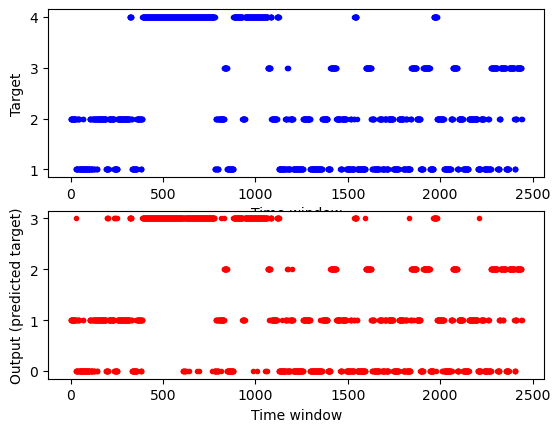

CPU times: total: 14min 21s
Wall time: 12min 50s


In [16]:
%%time 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score


sensor_names = ['Acc_x', 'Acc_y', 'Acc_z', 'Gyr_x', 'Gyr_y', 'Gyr_z']
BASE_PATH = "Downloads/Train_1/"
train_suffix = '_train_1.csv'
test_suffix = '_train_2.csv'
def load_sensor_data(sensor_names, suffix):
    data_slice_0 = np.loadtxt(BASE_PATH + sensor_names[0] + suffix, delimiter=',')
    data = np.empty((data_slice_0.shape[0], data_slice_0.shape[1],len(sensor_names)))
    data[:, :, 0] = data_slice_0
    for sensor_index in range(1, len(sensor_names)):
        data[:, :, sensor_index] = np.loadtxt(BASE_PATH + sensor_names[sensor_index] + suffix, delimiter=',')
    return data
# Load labels and sensor data into 3-D array
train_labels = np.loadtxt(BASE_PATH + 'labels' + train_suffix, dtype='int')
train_data = load_sensor_data(sensor_names, train_suffix)
test_labels = np.loadtxt(BASE_PATH + 'labels' + test_suffix, dtype='int')
test_data = load_sensor_data(sensor_names, test_suffix)
# Predict activities on test data
test_outputs = predict_test(train_data, train_labels, test_data)
# Compute micro and macro-averaged F1 scores
micro_f1 = f1_score(test_labels, test_outputs+1, average='micro')
macro_f1 = f1_score(test_labels, test_outputs+1, average='macro')
print(f'Micro-averaged F1 score: {micro_f1}')
print(f'Macro-averaged F1 score: {macro_f1}')
# Examine outputs compared to labels
n_test = test_labels.size
plt.subplot(2, 1, 1)
plt.plot(np.arange(n_test), test_labels, 'b.')
plt.xlabel('Time window')
plt.ylabel('Target')
plt.subplot(2, 1, 2)
plt.plot(np.arange(n_test), test_outputs, 'r.')
plt.xlabel('Time window')
plt.ylabel('Output (predicted target)')
plt.show()


In [ ]:
inputs = np.array(val_ff)

In [ ]:
inputs